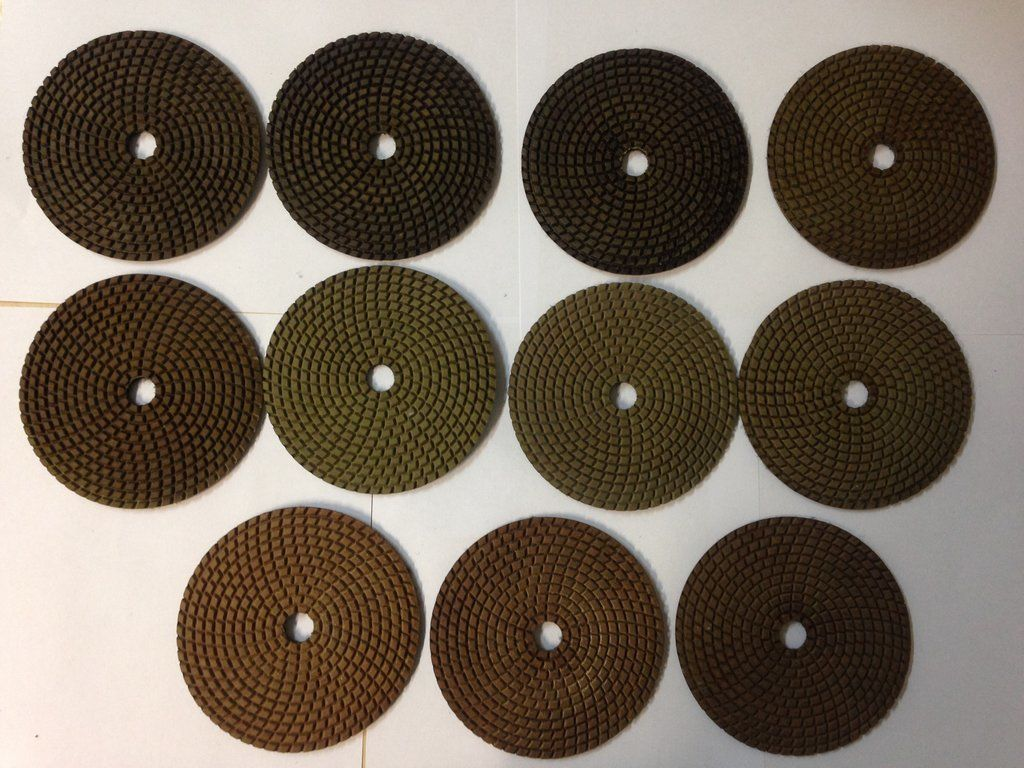

In [39]:
import IPython.display 
import math 
import cv2
import PIL
# Load image:

img = cv2.imread('circl.jpg')

IPython.display.Image('circl.jpg', width=320, height=240)

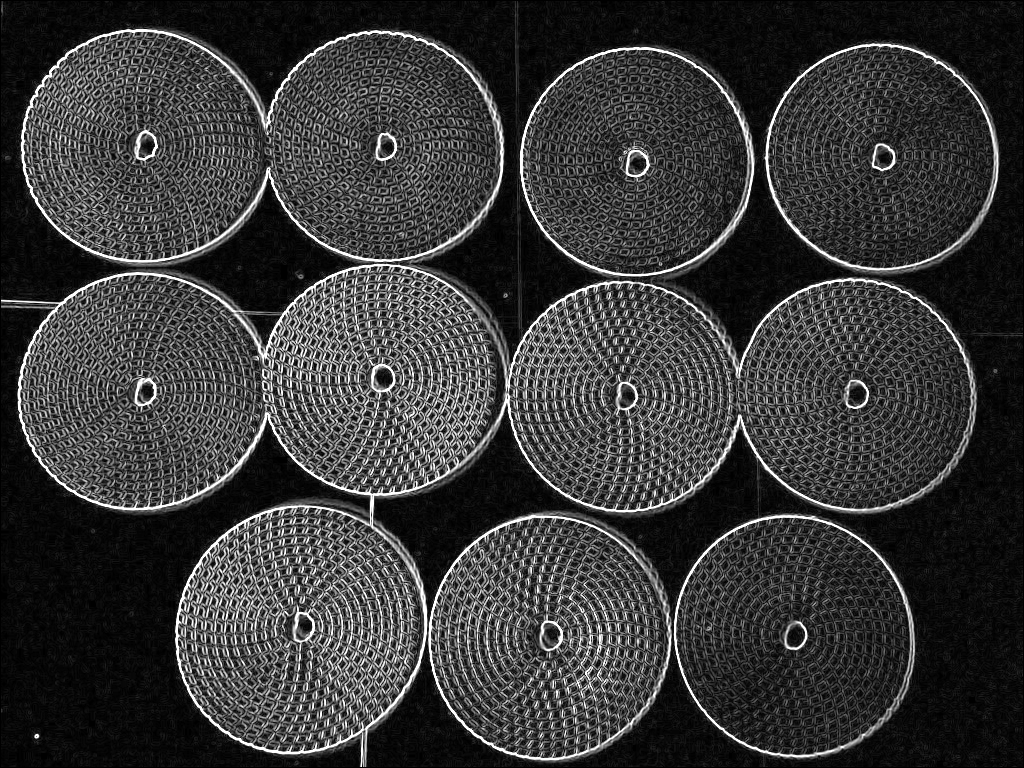

In [40]:
from PIL import Image, ImageDraw
# Load image:
input_image = Image.open('circl.jpg')
input_pixels = input_image.load()

# Sobel kernels
kernely = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
kernelx = [[-1, -2, -1],
           [0, 0, 0],
           [1, 2, 1]]

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(1, input_image.width - 1):
    for y in range(1, input_image.height - 1):
        magx, magy = 0, 0
        for a in range(3):
            for b in range(3):
                xn = x + a - 1
                yn = y + b - 1
                intensity = sum(input_pixels[xn, yn]) / 3
                magx += intensity * kernelx[a][b]
                magy += intensity * kernely[a][b]

        # Draw in black and white the magnitude
        color = int(math.sqrt(magx**2 + magy**2))
        draw.point((x, y), (color, color, color))
    
output_image.save("sobel.png")
IPython.display.Image("sobel.png", width=320, height=240) 

In [45]:
def HouphCircles (img, rmin, rmax, acc):
    h = math.sqrt(rmin**2/2)
    p={}
    for x in range(img.shape[1]):
        for y in range(img.shape[0]):
            if (img[y,x,0]>210):
                for x0 in range(x-rmax if x-rmax>=0 else 0, x+rmax+1 if x+rmax<img.shape[1] else img.shape[1]):
                    for y0 in range(y-rmax if y-rmax>=0 else 0, y+rmax+1 if y+rmax<img.shape[0] else img.shape[0]):
                        r = int(math.sqrt((x-x0)**2+(y-y0)**2))
                        if r<= rmax and r>=rmin and math.fabs (r - math.sqrt((x-x0)**2+(y-y0)**2))<acc:
                            if p.get((y0,x0,r))==None:
                                p[(y0,x0,r)]=1
                            else:
                                p[(y0,x0,r)]+=1
                                if p[(y0,x0,r)]>=40:
                                    print((y0,x0,r),p[(y0,x0,r)] )
                                
    sorted_p = sorted(p.items(), key=lambda item: item[1], reverse=True)
    res=[]
    while sorted_p[0][1]>50:
        res.append (sorted_p[0][0])
        sorted_p.pop(0)
        
    return res             

(146, 132, 111) 40
(146, 133, 111) 40
(146, 133, 111) 41
(146, 132, 111) 41
(145, 132, 111) 40
(146, 132, 111) 42
(147, 132, 111) 40
(146, 133, 111) 42
(146, 133, 111) 43
(145, 132, 111) 41
(145, 132, 111) 42
(146, 132, 111) 43
(147, 132, 111) 41
(146, 133, 111) 44
(146, 132, 111) 44
(147, 132, 111) 42
(146, 133, 111) 45
(147, 133, 111) 40
(393, 138, 119) 40
(393, 138, 119) 41
(145, 136, 114) 40
(145, 136, 114) 41
(146, 136, 114) 40
(145, 136, 114) 42
(146, 136, 114) 41
(145, 132, 111) 43
(146, 132, 111) 45
(147, 132, 111) 43
(393, 138, 119) 42
(392, 138, 119) 40
(146, 133, 111) 46
(147, 133, 111) 41
(147, 132, 111) 44
(146, 135, 114) 40
(145, 136, 114) 43
(146, 136, 114) 42
(147, 133, 111) 42
(145, 136, 114) 44
(148, 133, 111) 40
(146, 136, 114) 43
(396, 130, 111) 40
(392, 138, 119) 41
(393, 138, 119) 43
(394, 138, 119) 40
(147, 132, 111) 45
(393, 136, 117) 40
(147, 133, 111) 43
(148, 133, 111) 41
(396, 130, 111) 41
(147, 132, 111) 46
(393, 136, 117) 41
(147, 133, 111) 44
(148, 133, 1

(391, 137, 118) 46
(392, 137, 119) 41
(391, 137, 117) 46
(392, 137, 118) 44
(393, 137, 119) 44
(394, 133, 114) 51
(395, 133, 114) 48
(391, 137, 117) 47
(391, 137, 118) 47
(147, 138, 117) 42
(391, 138, 118) 42
(392, 138, 119) 54
(391, 138, 117) 44
(393, 138, 119) 56
(396, 130, 112) 42
(391, 138, 117) 45
(391, 138, 118) 43
(146, 139, 117) 48
(147, 139, 117) 45
(144, 139, 117) 45
(391, 139, 118) 42
(392, 139, 119) 43
(393, 139, 120) 41
(393, 139, 119) 46
(394, 139, 120) 41
(395, 131, 113) 40
(396, 131, 112) 46
(397, 131, 112) 42
(391, 139, 118) 43
(146, 140, 117) 48
(148, 140, 119) 40
(147, 140, 117) 42
(144, 136, 114) 45
(147, 136, 114) 50
(144, 140, 117) 42
(393, 140, 119) 40
(395, 132, 114) 46
(396, 132, 113) 40
(148, 141, 119) 44
(149, 141, 119) 42
(147, 137, 114) 42
(395, 133, 114) 49
(144, 136, 114) 46
(393, 139, 120) 42
(393, 134, 116) 41
(391, 135, 117) 52
(392, 135, 116) 41
(391, 135, 118) 40
(392, 135, 117) 51
(393, 135, 116) 44
(393, 135, 117) 41
(393, 139, 120) 43
(391, 136, 1

(640, 287, 111) 43
(640, 288, 111) 42
(641, 288, 111) 43
(640, 287, 111) 44
(640, 288, 111) 43
(641, 288, 111) 44
(640, 288, 112) 40
(641, 288, 111) 45
(640, 288, 112) 41
(641, 288, 111) 46
(638, 290, 114) 40
(634, 294, 119) 40
(638, 290, 114) 41
(639, 290, 114) 40
(636, 293, 117) 40
(634, 294, 119) 41
(638, 290, 114) 42
(639, 290, 114) 41
(636, 293, 117) 41
(634, 294, 119) 42
(635, 292, 117) 40
(635, 293, 117) 40
(636, 293, 117) 42
(635, 292, 117) 41
(635, 293, 117) 41
(636, 292, 117) 40
(636, 293, 117) 43
(634, 294, 119) 43
(634, 295, 119) 40
(635, 292, 117) 42
(635, 293, 117) 42
(636, 292, 117) 41
(636, 293, 117) 44
(634, 294, 119) 44
(634, 295, 119) 41
(635, 293, 117) 43
(636, 293, 117) 45
(634, 294, 119) 45
(635, 294, 118) 40
(634, 295, 119) 42
(634, 294, 119) 46
(635, 294, 118) 41
(634, 295, 119) 43
(634, 295, 119) 44
(640, 287, 111) 45
(640, 288, 112) 42
(641, 288, 111) 47
(635, 292, 117) 43
(636, 292, 117) 42
(641, 288, 111) 48
(635, 293, 117) 44
(636, 293, 117) 46
(634, 294, 1

(642, 290, 111) 47
(625, 303, 119) 40
(380, 375, 114) 43
(377, 379, 117) 43
(632, 296, 119) 42
(633, 296, 119) 41
(642, 293, 111) 40
(639, 289, 113) 41
(640, 289, 113) 42
(642, 291, 111) 44
(639, 289, 112) 40
(639, 289, 112) 41
(640, 289, 112) 43
(639, 289, 112) 42
(640, 289, 112) 44
(641, 289, 112) 44
(642, 290, 111) 48
(625, 304, 119) 42
(143, 376, 111) 45
(144, 376, 112) 41
(380, 376, 114) 55
(377, 380, 117) 40
(144, 377, 112) 41
(379, 377, 114) 57
(379, 377, 114) 58
(380, 377, 114) 55
(146, 378, 114) 40
(379, 378, 114) 42
(379, 378, 114) 43
(380, 378, 114) 41
(625, 303, 119) 41
(146, 379, 114) 46
(380, 372, 111) 42
(381, 372, 111) 40
(380, 375, 114) 44
(146, 380, 114) 50
(144, 376, 112) 42
(146, 380, 114) 51
(380, 376, 114) 56
(632, 295, 119) 40
(633, 295, 119) 49
(634, 295, 119) 48
(144, 377, 112) 42
(146, 381, 114) 40
(380, 377, 114) 56
(633, 296, 119) 42
(634, 296, 119) 41
(625, 303, 119) 42
(145, 378, 114) 41
(146, 378, 114) 41
(380, 378, 114) 42
(625, 304, 119) 43
(145, 379, 1

(151, 380, 119) 45
(379, 375, 114) 40
(380, 375, 114) 51
(383, 375, 111) 40
(379, 375, 114) 41
(380, 375, 114) 52
(142, 385, 119) 42
(151, 380, 119) 46
(151, 380, 119) 47
(146, 383, 114) 46
(145, 382, 114) 40
(147, 383, 114) 46
(146, 382, 114) 49
(147, 382, 114) 46
(379, 375, 114) 42
(380, 375, 114) 53
(377, 377, 117) 47
(380, 379, 114) 42
(151, 381, 119) 40
(146, 384, 114) 40
(147, 383, 114) 47
(151, 381, 119) 41
(151, 380, 119) 48
(142, 385, 119) 43
(151, 381, 119) 42
(383, 381, 119) 47
(146, 384, 114) 41
(145, 382, 114) 41
(146, 384, 114) 42
(147, 384, 114) 40
(144, 383, 117) 43
(151, 381, 119) 43
(143, 383, 117) 43
(143, 383, 117) 44
(144, 383, 117) 44
(143, 383, 117) 45
(144, 383, 117) 45
(143, 383, 117) 46
(144, 383, 117) 46
(151, 381, 119) 44
(149, 389, 111) 40
(151, 381, 119) 45
(149, 389, 111) 41
(151, 381, 119) 46
(149, 389, 111) 42
(151, 381, 119) 47
(149, 389, 111) 43
(151, 381, 119) 48
(144, 384, 117) 41
(144, 384, 117) 42
(144, 384, 117) 43
(144, 384, 117) 44
(143, 384, 1

(395, 622, 114) 46
(393, 619, 111) 44
(394, 620, 112) 43
(396, 621, 114) 43
(396, 622, 114) 58
(396, 623, 114) 45
(396, 621, 114) 44
(396, 622, 114) 59
(396, 623, 114) 46
(397, 622, 114) 41
(634, 547, 117) 48
(395, 622, 114) 47
(394, 620, 112) 44
(395, 621, 113) 40
(396, 621, 114) 45
(396, 622, 114) 60
(396, 623, 114) 47
(396, 621, 114) 46
(396, 622, 114) 61
(396, 623, 114) 48
(397, 622, 114) 42
(395, 622, 114) 48
(395, 623, 114) 40
(395, 621, 113) 41
(396, 621, 114) 47
(396, 622, 114) 62
(396, 623, 114) 49
(396, 621, 114) 48
(396, 622, 114) 63
(396, 623, 114) 50
(397, 622, 114) 43
(636, 547, 119) 42
(395, 622, 114) 49
(395, 623, 114) 41
(396, 622, 114) 64
(396, 623, 114) 51
(395, 622, 114) 50
(395, 623, 114) 42
(396, 622, 114) 65
(396, 623, 114) 52
(397, 622, 114) 44
(397, 623, 114) 40
(636, 547, 119) 43
(637, 548, 119) 42
(638, 548, 119) 40
(636, 548, 119) 52
(161, 631, 111) 53
(163, 631, 111) 53
(395, 623, 114) 43
(396, 623, 114) 53
(396, 623, 114) 54
(397, 623, 114) 41
(637, 548, 1

(397, 623, 114) 44
(638, 548, 119) 43
(636, 549, 119) 48
(639, 548, 119) 51
(640, 548, 119) 45
(636, 549, 120) 40
(164, 638, 117) 42
(165, 638, 117) 41
(159, 633, 111) 46
(163, 633, 111) 46
(164, 633, 111) 46
(396, 624, 114) 41
(396, 624, 114) 42
(636, 549, 119) 49
(640, 549, 119) 44
(393, 619, 111) 46
(393, 620, 111) 43
(164, 631, 111) 47
(159, 632, 111) 42
(160, 632, 112) 41
(163, 632, 112) 54
(164, 632, 111) 53
(165, 637, 117) 41
(159, 633, 111) 47
(160, 633, 112) 45
(161, 633, 113) 56
(162, 633, 113) 55
(163, 633, 112) 50
(164, 633, 111) 47
(393, 625, 117) 43
(394, 625, 117) 44
(639, 548, 119) 52
(640, 548, 119) 46
(636, 549, 120) 41
(637, 549, 120) 44
(161, 634, 114) 51
(165, 638, 117) 42
(160, 634, 112) 40
(161, 634, 113) 58
(162, 634, 114) 57
(160, 634, 114) 41
(161, 634, 113) 59
(162, 634, 112) 40
(161, 634, 114) 52
(162, 634, 113) 55
(163, 634, 112) 41
(162, 634, 114) 58
(392, 626, 118) 43
(161, 635, 114) 61
(161, 635, 113) 49
(162, 635, 114) 59
(160, 635, 114) 41
(161, 635, 1

(396, 625, 114) 48
(393, 625, 117) 48
(397, 625, 114) 40
(162, 636, 114) 63
(159, 634, 112) 40
(161, 635, 113) 56
(163, 636, 114) 43
(162, 635, 113) 52
(160, 636, 114) 42
(161, 636, 114) 65
(162, 636, 114) 64
(161, 636, 113) 42
(161, 633, 114) 45
(161, 636, 113) 43
(161, 637, 114) 44
(391, 625, 119) 43
(160, 634, 114) 48
(166, 637, 117) 44
(161, 634, 114) 67
(162, 634, 114) 73
(161, 634, 114) 68
(162, 634, 114) 74
(163, 634, 114) 46
(400, 623, 111) 40
(394, 624, 116) 40
(395, 624, 116) 40
(161, 635, 114) 77
(162, 635, 114) 74
(161, 634, 113) 66
(163, 635, 114) 54
(161, 635, 114) 78
(162, 635, 114) 75
(163, 635, 114) 55
(162, 636, 114) 65
(161, 635, 113) 57
(163, 636, 114) 44
(162, 635, 113) 53
(162, 635, 113) 54
(160, 636, 114) 43
(161, 636, 114) 66
(162, 636, 114) 66
(161, 636, 113) 44
(159, 634, 112) 41
(160, 634, 112) 46
(161, 636, 113) 45
(161, 637, 114) 45
(396, 623, 114) 67
(394, 624, 116) 41
(392, 624, 118) 44
(395, 624, 116) 41
(161, 633, 114) 46
(397, 624, 114) 51
(396, 624, 1

(161, 637, 114) 50
(161, 637, 114) 51
(162, 637, 114) 41
(161, 637, 114) 52
(162, 637, 114) 42
(158, 636, 117) 44
(165, 635, 117) 42
(166, 635, 117) 41
(632, 794, 119) 40
(157, 635, 117) 40
(159, 636, 116) 43
(157, 635, 117) 41
(159, 636, 116) 44
(157, 635, 117) 42
(159, 636, 116) 45
(157, 635, 117) 43
(158, 635, 117) 40
(159, 636, 116) 46
(157, 635, 117) 44
(158, 635, 117) 41
(158, 636, 116) 40
(159, 636, 116) 47
(160, 638, 114) 40
(161, 639, 113) 40
(157, 635, 117) 45
(158, 635, 117) 42
(158, 636, 116) 41
(159, 636, 116) 48
(164, 636, 116) 40
(160, 638, 114) 41
(161, 638, 114) 40
(161, 639, 113) 41
(157, 635, 117) 46
(158, 635, 117) 43
(165, 635, 117) 43
(158, 636, 116) 42
(159, 636, 116) 49
(164, 636, 116) 41
(165, 636, 116) 43
(160, 638, 114) 42
(161, 638, 114) 41
(161, 639, 113) 42
(158, 635, 117) 44
(165, 635, 117) 44
(166, 635, 117) 42
(158, 636, 116) 43
(159, 636, 116) 50
(163, 636, 116) 40
(164, 636, 116) 42
(165, 636, 116) 44
(160, 638, 114) 43
(161, 638, 114) 42
(161, 639, 1

(390, 849, 111) 41
(391, 849, 111) 44
(392, 849, 112) 40
(392, 850, 112) 40
(629, 789, 114) 48
(633, 790, 117) 40
(633, 791, 117) 50
(634, 791, 117) 41
(636, 789, 119) 47
(634, 792, 117) 41
(636, 790, 119) 41
(636, 789, 119) 48
(632, 790, 116) 45
(636, 790, 119) 42
(390, 849, 111) 42
(636, 791, 119) 40
(632, 790, 116) 46
(155, 877, 111) 45
(156, 877, 111) 59
(157, 877, 111) 51
(155, 877, 111) 46
(155, 878, 111) 56
(156, 878, 112) 46
(155, 876, 110) 40
(156, 877, 111) 60
(156, 878, 111) 60
(157, 877, 111) 52
(156, 878, 112) 47
(157, 878, 111) 56
(157, 878, 112) 40
(631, 790, 116) 40
(632, 790, 116) 47
(155, 877, 111) 47
(155, 878, 111) 57
(156, 878, 112) 48
(156, 879, 112) 50
(155, 876, 110) 41
(155, 877, 110) 40
(156, 877, 111) 61
(156, 878, 111) 61
(157, 878, 112) 41
(157, 879, 112) 45
(157, 877, 111) 53
(156, 878, 112) 49
(157, 878, 111) 57
(156, 879, 112) 51
(157, 878, 112) 42
(157, 879, 112) 46
(390, 849, 111) 43
(391, 849, 112) 40
(631, 790, 116) 41
(632, 790, 116) 48
(155, 877, 1

(152, 883, 117) 41
(157, 879, 113) 40
(155, 877, 111) 59
(156, 877, 111) 74
(157, 877, 112) 46
(157, 879, 113) 41
(157, 882, 112) 40
(393, 851, 114) 41
(157, 880, 113) 43
(158, 880, 114) 42
(155, 878, 111) 70
(156, 878, 112) 68
(158, 880, 113) 41
(159, 880, 114) 43
(156, 878, 111) 75
(157, 878, 112) 64
(155, 880, 114) 41
(156, 880, 113) 44
(157, 880, 113) 44
(392, 852, 114) 45
(393, 852, 114) 53
(155, 879, 111) 48
(156, 879, 112) 72
(154, 877, 110) 42
(156, 879, 111) 52
(157, 879, 112) 70
(155, 877, 110) 51
(155, 881, 114) 48
(152, 883, 117) 42
(393, 853, 114) 43
(394, 853, 114) 40
(156, 880, 112) 54
(157, 880, 112) 52
(155, 876, 110) 48
(154, 877, 110) 43
(155, 877, 110) 52
(157, 881, 112) 44
(155, 876, 110) 49
(157, 882, 112) 41
(154, 877, 110) 44
(155, 877, 110) 53
(154, 876, 110) 40
(152, 883, 117) 43
(392, 852, 114) 46
(159, 880, 114) 44
(154, 877, 110) 45
(393, 853, 114) 44
(155, 876, 111) 42
(155, 881, 114) 49
(159, 880, 114) 45
(155, 877, 111) 60
(155, 878, 111) 71
(156, 878, 1

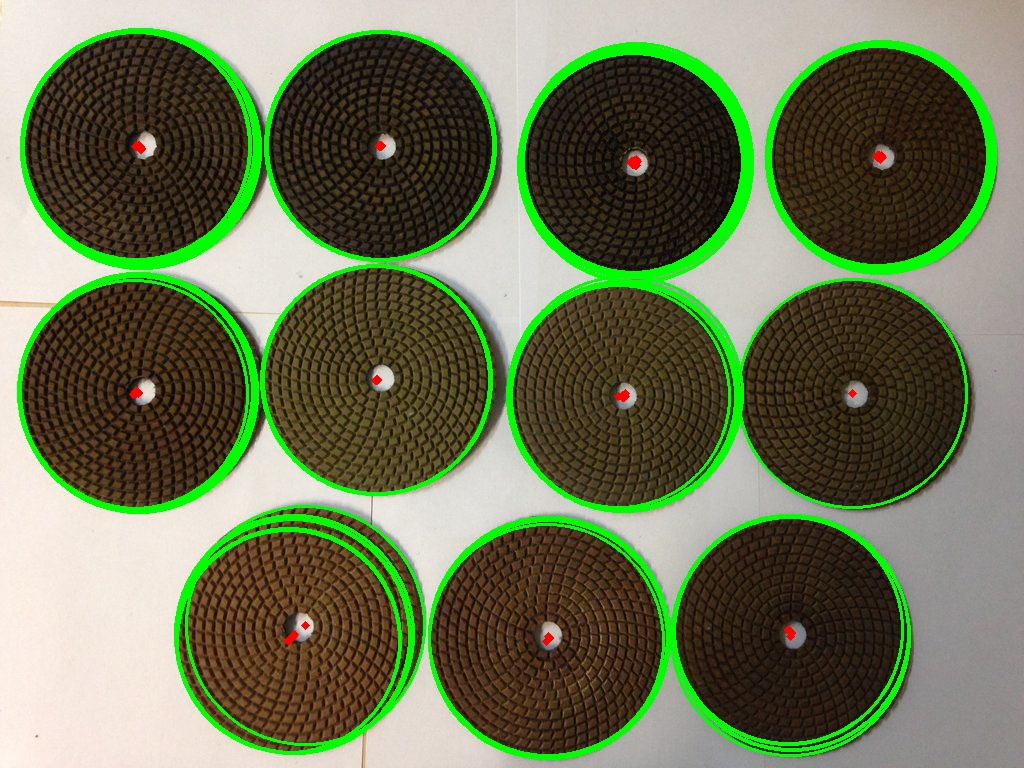

In [46]:
col_img = cv2.imread('circl.jpg')
img = cv2.imread("sobel.png")
img = cv2.bilateralFilter(img,9,75,75)
circles = HouphCircles (img, 10, 120, 0.1)

for i in circles:
    cv2.circle(col_img,(i[1],i[0]),i[2],(0,255,0),2)
    #draws the circumference of the circle
    cv2.circle(col_img,(i[1],i[0]),2,(0,0,255),3)
    #draws the centre of the circle

cv2.imwrite('hough_circles.jpg',col_img)
IPython.display.Image('hough_circles.jpg', width=320, height=240)